<a href="https://colab.research.google.com/github/dileepyadavns/customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Loading DataSet**

In [13]:
df=pd.read_csv("/content/customer_segmentation.csv", encoding='latin-1')

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1343
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     104483
Country             1
dtype: int64

In [16]:
df = df[pd.notnull(df['CustomerID'])]


In [17]:
df.shape

(308494, 8)

In [18]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [20]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
df['InvoiceDate']

0           12/1/2010 8:26
1           12/1/2010 8:26
2           12/1/2010 8:26
3           12/1/2010 8:26
4           12/1/2010 8:26
                ...       
412971    10/23/2011 14:47
412972    10/23/2011 14:47
412973    10/23/2011 14:47
412974    10/23/2011 14:47
412975    10/23/2011 14:47
Name: InvoiceDate, Length: 308494, dtype: object

In [22]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [23]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
412971   2011-10-23 14:47:00
412972   2011-10-23 14:47:00
412973   2011-10-23 14:47:00
412974   2011-10-23 14:47:00
412975   2011-10-23 14:47:00
Name: InvoiceDate, Length: 308494, dtype: datetime64[ns]

In [24]:
df['rank'] = df.sort_values(['CustomerID','InvoiceDate']).groupby(['CustomerID'])['InvoiceDate'].rank(method='min').astype(int)


In [25]:
df_rec = df[df['rank']==1]

In [26]:
df_rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
412971,572302,21912,VINTAGE SNAKES & LADDERS,2.0,2011-10-23 14:47:00,3.75,15427.0,United Kingdom,1
412972,572302,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1.0,2011-10-23 14:47:00,3.25,15427.0,United Kingdom,1
412973,572302,22897,OVEN MITT APPLES DESIGN,2.0,2011-10-23 14:47:00,1.45,15427.0,United Kingdom,1
412974,572302,22840,ROUND CAKE TIN VINTAGE RED,2.0,2011-10-23 14:47:00,7.95,15427.0,United Kingdom,1


**Finding Recency values**



In [27]:
df_rec['recency'] = (df_rec['InvoiceDate'] - pd.to_datetime(min(df_rec['InvoiceDate']))).dt.days


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_rec['recency']

0           0
1           0
2           0
3           0
4           0
         ... 
412971    326
412972    326
412973    326
412974    326
412975    326
Name: recency, Length: 87131, dtype: int64

In [29]:
(df_rec['InvoiceDate'] - pd.to_datetime(min(df_rec['InvoiceDate']))).dt.days

0           0
1           0
2           0
3           0
4           0
         ... 
412971    326
412972    326
412973    326
412974    326
412975    326
Name: InvoiceDate, Length: 87131, dtype: int64

In [30]:
freq = df_rec.groupby('CustomerID')['InvoiceDate'].count()
df_freq = pd.DataFrame(freq).reset_index()

**Finding frequent values**

In [31]:
df_freq

,CustomerID,InvoiceDate
0,12346.0,1
1,12347.0,31
2,12348.0,17
3,12350.0,17
4,12352.0,15
...,...,...
3912,18280.0,10
3913,18281.0,7
3914,18282.0,7
3915,18283.0,57


In [32]:
df_freq.columns=['CustomerID','Frequency']

In [33]:
df_freq

,CustomerID,Frequency
0,12346.0,1
1,12347.0,31
2,12348.0,17
3,12350.0,17
4,12352.0,15
...,...,...
3912,18280.0,10
3913,18281.0,7
3914,18282.0,7
3915,18283.0,57


In [34]:
rec_freq=df_freq.merge(df_rec, on='CustomerID')

In [35]:
rec_freq.head(5)

,CustomerID,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,United Kingdom,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12.0,2010-12-07 14:57:00,2.10,Iceland,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4.0,2010-12-07 14:57:00,4.25,Iceland,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12.0,2010-12-07 14:57:00,3.25,Iceland,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36.0,2010-12-07 14:57:00,0.65,Iceland,1,6


**Finding Monetary Values**

In [36]:
rec_freq['total']=rec_freq['Quantity']*rec_freq['UnitPrice']

In [37]:
rec_freq['total']

0        77183.6
1           25.2
2           17.0
3           39.0
4           23.4
          ...   
87126       59.4
87127       87.0
87128       19.8
87129       19.8
87130       25.2
Name: total, Length: 87131, dtype: float64

In [38]:
m=rec_freq.groupby("CustomerID")['total'].sum()

In [39]:
m

CustomerID
12346.0    77183.60
12347.0      711.79
12348.0      892.80
12350.0      334.40
12352.0      296.50
             ...   
18280.0      180.60
18281.0       80.82
18282.0      100.21
18283.0      108.45
18287.0      765.28
Name: total, Length: 3917, dtype: float64

In [40]:
m=pd.DataFrame(m).reset_index()

In [41]:
m

,CustomerID,total
0,12346.0,77183.60
1,12347.0,711.79
2,12348.0,892.80
3,12350.0,334.40
4,12352.0,296.50
...,...,...
3912,18280.0,180.60
3913,18281.0,80.82
3914,18282.0,100.21
3915,18283.0,108.45


In [42]:
m.columns=["CustomerID",'Monetary Value']

In [43]:
m

,CustomerID,Monetary Value
0,12346.0,77183.60
1,12347.0,711.79
2,12348.0,892.80
3,12350.0,334.40
4,12352.0,296.50
...,...,...
3912,18280.0,180.60
3913,18281.0,80.82
3914,18282.0,100.21
3915,18283.0,108.45


In [44]:
rec_freq=rec_freq.merge(m,on="CustomerID")

**Creating dataset with three meaningful variables**

In [45]:
rfm_df=rec_freq.loc[:,['CustomerID','Frequency','recency','Monetary Value']]

In [46]:
rfm_df

,CustomerID,Frequency,recency,Monetary Value
0,12346.0,1,48,77183.60
1,12347.0,31,6,711.79
2,12347.0,31,6,711.79
3,12347.0,31,6,711.79
4,12347.0,31,6,711.79
...,...,...,...,...
87126,18287.0,29,172,765.28
87127,18287.0,29,172,765.28
87128,18287.0,29,172,765.28
87129,18287.0,29,172,765.28


**Removing Outliers**

recency: 


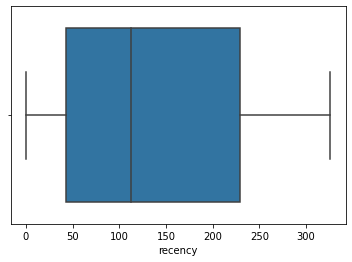

Frequency: 


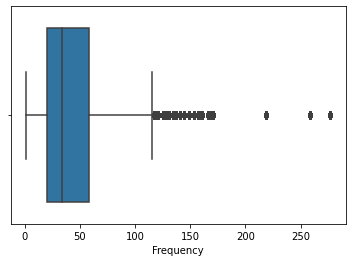

Monetary Value: 


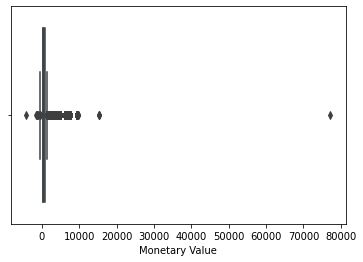

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['recency','Frequency','Monetary Value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=rfm_df[str(i)])
    plt.show()

In [48]:
from scipy import stats
import numpy as np
# remove outliers
z_scores = stats.zscore(rfm_df)

In [49]:
rfm_df

,CustomerID,Frequency,recency,Monetary Value
0,12346.0,1,48,77183.60
1,12347.0,31,6,711.79
2,12347.0,31,6,711.79
3,12347.0,31,6,711.79
4,12347.0,31,6,711.79
...,...,...,...,...
87126,18287.0,29,172,765.28
87127,18287.0,29,172,765.28
87128,18287.0,29,172,765.28
87129,18287.0,29,172,765.28


In [50]:
z_scores

,CustomerID,Frequency,recency,Monetary Value
0,-1.683188,-1.128008,-0.832458,97.699995
1,-1.682607,-0.361892,-1.230999,0.135096
2,-1.682607,-0.361892,-1.230999,0.135096
3,-1.682607,-0.361892,-1.230999,0.135096
4,-1.682607,-0.361892,-1.230999,0.135096
...,...,...,...,...
87126,1.771544,-0.412966,0.344190,0.203340
87127,1.771544,-0.412966,0.344190,0.203340
87128,1.771544,-0.412966,0.344190,0.203340
87129,1.771544,-0.412966,0.344190,0.203340


In [51]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)


In [52]:
rfm_df.loc[filtered_entries]



,CustomerID,Frequency,recency,Monetary Value
1,12347.0,31,6,711.79
2,12347.0,31,6,711.79
3,12347.0,31,6,711.79
4,12347.0,31,6,711.79
5,12347.0,31,6,711.79
...,...,...,...,...
87126,18287.0,29,172,765.28
87127,18287.0,29,172,765.28
87128,18287.0,29,172,765.28
87129,18287.0,29,172,765.28


In [53]:
from sklearn.preprocessing import StandardScaler
rfm_df = rfm_df.drop_duplicates()
col_names = ['recency', 'Frequency', 'Monetary Value']
features = rfm_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features,columns=col_names)


In [54]:
scaled_features

,recency,Frequency,Monetary Value
0,-0.747614,-0.940722,56.958738
1,-1.157570,0.387711,0.225667
2,-1.069722,-0.232224,0.359955
3,-0.601201,-0.232224,-0.054312
4,-0.464549,-0.320786,-0.082429
...,...,...,...
3912,-0.279093,-0.542192,-0.168413
3913,0.667710,-0.675035,-0.242438
3914,1.194797,-0.675035,-0.228053
3915,-0.864744,1.539019,-0.221940


Text(0, 0.5, 'Inertia')

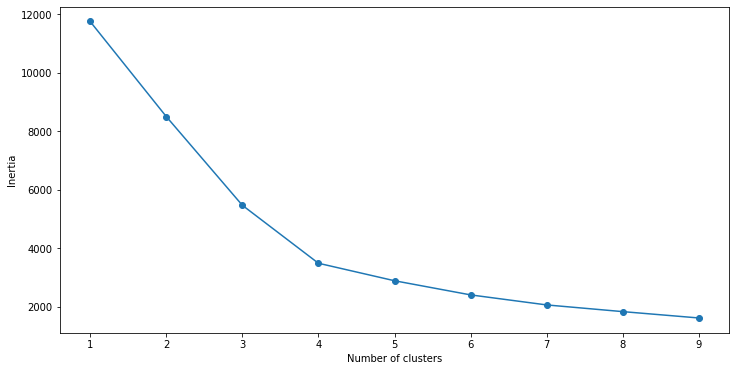

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [56]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [57]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
412971,572302,21912,VINTAGE SNAKES & LADDERS,2.0,2011-10-23 14:47:00,3.75,15427.0,United Kingdom,1
412972,572302,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1.0,2011-10-23 14:47:00,3.25,15427.0,United Kingdom,1
412973,572302,22897,OVEN MITT APPLES DESIGN,2.0,2011-10-23 14:47:00,1.45,15427.0,United Kingdom,1
412974,572302,22840,ROUND CAKE TIN VINTAGE RED,2.0,2011-10-23 14:47:00,7.95,15427.0,United Kingdom,1


In [58]:
y_kmeans = kmeans.predict(scaled_features)
frame = pd.DataFrame(rfm_df)
frame['cluster'] = y_kmeans

In [59]:
frame['cluster']

0        2
1        1
32       1
49       1
66       1
        ..
87021    1
87031    3
87038    3
87045    0
87102    3
Name: cluster, Length: 3917, dtype: int32

In [60]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = frame.loc[frame['cluster']==1]
print(filtered_label0)
 


       CustomerID  Frequency  recency  Monetary Value  cluster
1         12347.0         31        6          711.79        1
32        12348.0         17       15          892.80        1
49        12350.0         17       63          334.40        1
66        12352.0         15       77          296.50        1
156       12356.0         36       48         2271.62        1
...           ...        ...      ...             ...      ...
86972     18270.0          5      107          111.95        1
86977     18272.0         33      127          639.82        1
87010     18273.0          1      116           51.00        1
87011     18277.0          1       55          -12.75        1
87021     18280.0         10       96          180.60        1

[2204 rows x 5 columns]


In [61]:
frame

,CustomerID,Frequency,recency,Monetary Value,cluster
0,12346.0,1,48,77183.60,2
1,12347.0,31,6,711.79,1
32,12348.0,17,15,892.80,1
49,12350.0,17,63,334.40,1
66,12352.0,15,77,296.50,1
...,...,...,...,...,...
87021,18280.0,10,96,180.60,1
87031,18281.0,7,193,80.82,3
87038,18282.0,7,247,100.21,3
87045,18283.0,57,36,108.45,0


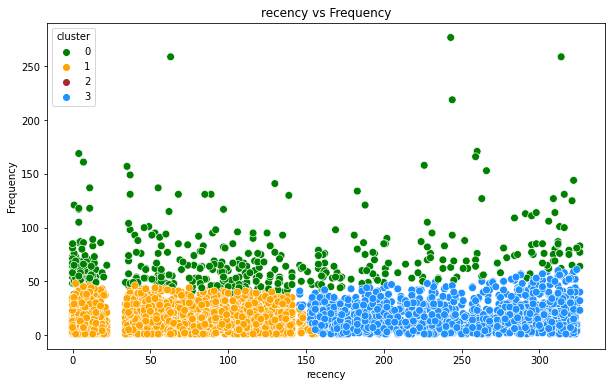

In [62]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'recency',y = 'Frequency',hue="cluster",  
                 palette=['green','orange','brown','dodgerblue'], legend='full',data = frame  ,s = 60 )
plt.xlabel('recency')
plt.ylabel('Frequency') 
plt.title('recency vs Frequency')
plt.show()

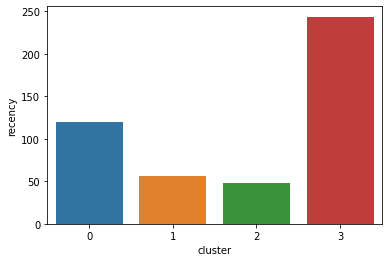

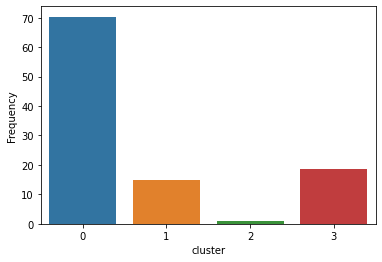

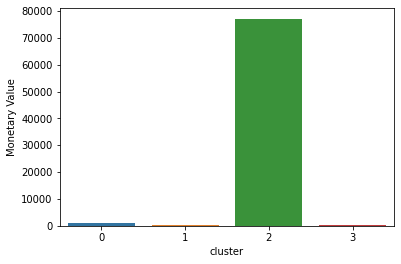

In [63]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

In [64]:
# plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],color='red',s=100,label='cluster1')
# plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],c='blue',s=100,label='cluster2')
# plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],c='pink',s=100,label='cluster3')
# plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],c='green',s=100,label='cluster4')
# plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],c='brown',s=100,label='cluster5')
# plt.title("KMeans Clusttering")
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# plt.legend()
# plt.show()